In [ ]:
# Based off of the object detection tutorial by Nicholas Renotte
# Tutorial Link: https://www.youtube.com/watch?v=0efnQCHbsyE
# Used game 'Monaco: What's Yours Is Mine' instead of Timberborne

In [ ]:
# Install Dependencies

In [9]:
# Checks what sort of graphics card is available, if any
!lspci | grep VGA

01:00.0 VGA compatible controller: NVIDIA Corporation GM107 [GeForce GTX 745] (rev a2)


In [10]:
# Checks which version of CUDA is available, if any
# sudo apt install nvidia-cuda-toolkit
!which nvcc
#!nvcc --version

/usr/local/cuda/bin/nvcc


In [ ]:
# Refer to the following link for CUDA issues: 
# https://stackoverflow.com/questions/60987997/why-torch-cuda-is-available-returns-false-even-after-installing-pytorch-with

# The system requirements to use PyTorch with CUDA are as follows:
# 1. Your graphics card must support the required version of CUDA
# 2. Your graphics card driver must support the required version of CUDA
# 3. The PyTorch binaries must be built with support for the compute capability of your graphics card

# The GPU must be able to support the desired version of CUDA

In [ ]:
# To install or update to the correct version of CUDA, input the following command in command line interface:

# sudo wget -O /etc/apt/preferences.d/cuda-repository-pin-600 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64/cuda-ubuntu2004.pin
# sudo apt-key adv --fetch-keys https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64/7fa2af80.pub
# sudo add-apt-repository "deb http://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64/ /"
# sudo apt update
# sudo apt install cuda
# echo 'export PATH=/usr/local/cuda/bin${PATH:+:${PATH}}' >> ~/.bashr

In [ ]:
# Installs PyTorch
!pip3 install torch==1.10.2+cu113 torchvision==0.11.3+cu113 torchaudio==0.10.2+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html
#!pip install torch torchvision torchaudio # PyTorch Version 10.2
#!pip uninstall torch torchvision torchaudio

In [ ]:
# Yolov5 is an object detection library with prebuilt models and training commands for an easier experience
!git clone https://github.com/ultralytics/yolov5

In [ ]:
# You cannot use '!cd' to navigate the filesystem from Jupyter notebook. 
# The reason is that shell commands (preceding with '!' symbol) in Jupyter notebook's code cells are 
# executed in a temporary subshell. If you'd like to change the working directory, you can use the 
# '%cd' magic command:

# Installs Yolov5's dependencies into the current environment
#!cd yolov5 & pip install -r requirements.txt --upgrade

In [1]:
# Import Dependencies

# Imports PyTorch
import torch

# Allows for the visualization of the detected in game objects
from matplotlib import pyplot as plt

# Allows for the data processing and capturing of the actual in game frames
import numpy as np


import cv2

In [11]:
# Check whether or not pytorch is able to find the GPU
print(torch.cuda.is_available())
print(torch.cuda.device_count())
print(torch.version.cuda)
!python3 -m torch.utils.collect_env 

True
1
11.3
PyTorch version: 1.10.2+cu113
Is debug build: False
CUDA used to build PyTorch: 11.3
ROCM used to build PyTorch: N/A

OS: Ubuntu 20.04.4 LTS (x86_64)
GCC version: (Ubuntu 9.4.0-1ubuntu1~20.04) 9.4.0
Clang version: Could not collect
CMake version: version 3.16.3
Libc version: glibc-2.31

Python version: 3.8.10 (default, Nov 26 2021, 20:14:08)  [GCC 9.3.0] (64-bit runtime)
Python platform: Linux-5.13.0-30-generic-x86_64-with-glibc2.29
Is CUDA available: True
CUDA runtime version: 11.6.112
GPU models and configuration: GPU 0: NVIDIA GeForce GTX 745
Nvidia driver version: 510.47.03
cuDNN version: Could not collect
HIP runtime version: N/A
MIOpen runtime version: N/A

Versions of relevant libraries:
[pip3] mypy-extensions==0.4.3
[pip3] numpy==1.22.2
[pip3] torch==1.10.2+cu113
[pip3] torchaudio==0.10.2+cu113
[pip3] torchvision==0.11.3+cu113
[conda] Could not collect


In [ ]:
# Load The Desired Model

In [ ]:
!pip install ipywidgets

In [12]:
# Imports the small version of the yolov5 model from the local repository
# Is essentially a pre trained template that must be further trained to identify our in game objects
model = torch.hub.load('yolov5', 'yolov5s', source = 'local', force_reload = True)

YOLOv5 🚀 v6.1-21-ge6e36aa torch 1.10.2+cu113 CUDA:0 (NVIDIA GeForce GTX 745, 4042MiB)

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients, 16.5 GFLOPs
Adding AutoShape... 


In [13]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): Model(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
           

In [14]:
# Carry Out Detection With Images

In [15]:
testImage = 'https://ultralytics.com/images/zidane.jpg'

In [16]:
model(testImage).print()

image 1/1: 720x1280 2 persons, 2 ties
Speed: 480.7ms pre-process, 54.3ms inference, 2.5ms NMS per image at shape (1, 3, 384, 640)


In [17]:
testResults = model(testImage)
testResults.print()

image 1/1: 720x1280 2 persons, 2 ties
Speed: 148.8ms pre-process, 54.6ms inference, 3.3ms NMS per image at shape (1, 3, 384, 640)


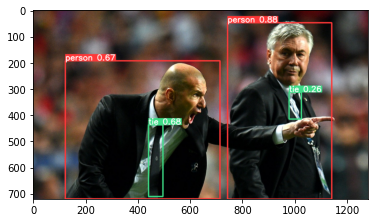

In [18]:
# Allows for the rendering of visualizations in line
%matplotlib inline
plt.imshow(np.squeeze(testResults.render()))
plt.show()

In [19]:
testResults.render()

[array([[[72, 48, 38],
         [74, 50, 40],
         [73, 51, 40],
         ...,
         [56, 21, 25],
         [55, 19, 21],
         [51, 15, 17]],
 
        [[71, 47, 37],
         [71, 47, 37],
         [70, 48, 37],
         ...,
         [55, 20, 24],
         [52, 16, 18],
         [47, 11, 13]],
 
        [[75, 51, 41],
         [73, 49, 39],
         [70, 48, 37],
         ...,
         [56, 20, 24],
         [52, 16, 20],
         [48, 12, 16]],
 
        ...,
 
        [[40, 43, 48],
         [41, 44, 49],
         [40, 43, 48],
         ...,
         [35, 49, 49],
         [35, 49, 49],
         [36, 50, 50]],
 
        [[39, 42, 49],
         [39, 42, 49],
         [39, 42, 49],
         ...,
         [35, 49, 50],
         [35, 49, 50],
         [36, 50, 51]],
 
        [[38, 41, 48],
         [38, 41, 48],
         [38, 41, 48],
         ...,
         [35, 49, 50],
         [35, 49, 50],
         [36, 50, 51]]], dtype=uint8)]

In [20]:
rawData = testResults.crop()

Saved 1 image to runs/detect/exp5
Saved results to runs/detect/exp5



In [21]:
rawData[1]

{'box': [tensor(123.05106, device='cuda:0'),
  tensor(193.23804, device='cuda:0'),
  tensor(714.69067, device='cuda:0'),
  tensor(719.77130, device='cuda:0')],
 'conf': tensor(0.66669, device='cuda:0'),
 'cls': tensor(0., device='cuda:0'),
 'label': 'person 0.67',
 'im': array([[[42, 60, 89],
         [43, 59, 88],
         [43, 59, 88],
         ...,
         [38, 54, 77],
         [41, 56, 82],
         [40, 57, 84]],
 
        [[45, 63, 92],
         [42, 60, 89],
         [41, 57, 86],
         ...,
         [37, 53, 76],
         [40, 56, 79],
         [41, 58, 85]],
 
        [[42, 62, 93],
         [40, 60, 91],
         [41, 59, 90],
         ...,
         [40, 56, 79],
         [38, 54, 77],
         [38, 55, 82]],
 
        ...,
 
        [[57, 70, 78],
         [59, 73, 79],
         [60, 74, 80],
         ...,
         [62, 65, 69],
         [58, 61, 65],
         [59, 61, 62]],
 
        [[56, 69, 77],
         [61, 73, 79],
         [62, 74, 80],
         ...,
         [5

In [ ]:
# Capture Computer Screen

In [ ]:
# PyAutoGui used to capture a screenshot of the current computer screen
!pip install pyautogui

In [ ]:
# On Linux, the Scrot application is required
# Documentation Link: https://pyautogui.readthedocs.io/en/latest/install.html

# Must be done in ther local command line terminal as it requires an input password
# sudo apt-get install scrot

# Should be automatically installed as Scrot' dependenciess if the previou code line is run
# sudo apt-get install python3-tk
# sudo apt-get install python3-dev

In [2]:
# Import The Dependencies
import pyautogui
import cv2
import numpy as np

In [ ]:
# Dual Screens
# Screen 1: 1680 x 1050 (16:10)
# Screen 2: 1920 x 1080 (16:9)
# Total Screen Length: 3600
# Total Screen Height: 1080
# 

# Focus in on the game window portion of the screen
# Using windowed version of the game 'Monaco: What's Yours Is Mine' at a resolution of 1280 x 720'
# Window adds 30 pixel of height and 5 pixel in width
# Placed window in upper right corner of Screen 2
# Screen Focus Length: 3600 - 1280 - 5 = 2320 # Start from right edge of Screen 2
# Screen Focus Height: 720 + 30 = 750 # Start from top edge of Screen 2
focusOnGameWindow = pyautogui.screenshot()
plt.imshow(np.array(focusOnGameWindow)[ :750 , 2315:])

In [ ]:
# Loops over the individual game frames
while True:
    
    # Takes a complete screen capture of the current computer screen
    screen = pyautogui.screenshot()
    
    # Converts the outputted screen capture into a numpy array
    screenArray = np.array(screen)
    
    # Crops out the desired region of the screen capture via index slicing (Adjust as needed)
    # First value is height (By pixel = Start:Finish)
    # Second value is width
    # Third value is the Red, Green, Blue color value channels
    croppedRegion = screenArray[ :750, 2315: , : ]
    
    # Convert the color channel order
    # Open CV2 expect the color format to come is a Blue, Green, Red as opposed to the standard Red, Green, Blue
    # giving the captured image a strange tint that must be rectified, adjust the color channel order
    correctedColors = cv2.cvtColor(croppedRegion, cv2.COLOR_RGB2BGR)
    
    # Carry out object detections
    results = model(correctedColors)
    
    # Handles the rendering of the images and videos
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    # CV2.WaitKey in order to give the in game frame a chance to reupdate
    # Gives a delay in miliseconds then checks if the 'q' letter has been hit on the keyboard
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    
    # Closes down the current OpenCV2 frame
    cv2.destroyAllWindows

In [ ]:
# Save creen Capture Images

In [3]:
# Unique Identified
import uuid
import os
import time

In [ ]:
# Attempted to shortcut the process by using the actual in game assets, believing the lack of backgroud noise 
# would make training the model easier with very few pictures, failed twice
# Third try manually highlighting individual labels worked, far from perfect but proof of concept proven

# Creates a directory of /data/images
IMAGES_PATH = os.path.join('data', 'images')

# The number of images we want to collect
numImgs = 25

In [ ]:
for imgNum in range(numImgs):
    print('Collecting image number: {}'.format(imgNum))
    
    screen = pyautogui.screenshot()
    screenArray = np.array(screen)
    croppedRegion = screenArray[ :750, 2315: , : ]
    
    # Passing through an image's name along with desired path, whilst giving it a
    # generated unique identifier for that specific image at that point in time
    imgName = os.path.join(IMAGES_PATH, str(uuid.uuid1()) + '.jpg')
    
    correctedColors = cv2.cvtColor(croppedRegion, cv2.COLOR_RGB2BGR)
    
    # Save the images into the /data/images directory
    cv2.imwrite(imgName, correctedColors)
    
    results = model(correctedColors)
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    # Provides a 2 second delay between image captures to allow the game to change frames
    # Gives variability between images
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    
    # Closes down the current OpenCV2 frame
    cv2.destroyAllWindows

In [ ]:
# Label Game Objects

In [ ]:
# Graphical Image Anotation Tool
# Will be making bounding boxes from the in game frame images previously captured
!git clone https://github.com/tzutalin/labelImg

In [ ]:
!pip install pyqt5 lxml --upgrade

In [ ]:
#!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [ ]:
%cd labelImg

In [ ]:
!pyrcc5 -o libs/resources.py resources.qrc

In [8]:
%cd ..

/home/maxbrette/Documents/github/GameObjectDetection


In [22]:
!pwd

/home/maxbrette/Documents/github/GameObjectDetection


In [23]:
# Train & Predict

In [24]:
# hyp: Hyperparameter parameter that Yolov5 uses to flip provided dataset images 
#      left and right to improve model detection, essentially creating new images
#      If left and right are important, has to be switched off manually in the 'hyp.scratch.yaml' file
#      fliplr: 0.0 value required

# Command Explanation:
# 1. Goes into yolov5 folder # Use '%cd' not '!cd' in Jupyter notebook
# 2. Trains the model # Use 'python3' not 'python'
# 3. Specifies the image size
# 4. Specifies the batch size
# 5. How long the model is to train for
# 6. Specifies the data path
# 7. Specifies the hyperparameters
# 8. Specifies the worker weights, preloading the yolov5 model via transfer learning to ensure the best possible
#    model with the least amount of training time for maximum efficiency
# 9. Specifies the number of workers
%cd yolov5

/home/maxbrette/Documents/github/GameObjectDetection/yolov5


In [26]:
!python3 train.py --img 320 --batch 16 --epochs 2000 --data dataset.yaml --hyp hyp.scratch.yaml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=hyp.scratch.yaml, epochs=2000, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 1 commit. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5 🚀 v6.1-21-ge6e36aa torch 1.10.2+cu113 CUDA:0 (NVIDIA GeForce GTX 745, 4042MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.01

    7/1999     1.07G    0.1052   0.02573   0.08627        70       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534     0.0433     0.0333     0.0147    0.00715

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    8/1999     1.07G    0.1023   0.02984   0.08433        65       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534     0.0108     0.0408     0.0123    0.00373

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    9/1999     1.07G   0.09682   0.03024   0.08311        44       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534     0.0151      0.142     0.0268    0.00803

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   10/1999     1.07G   0.09406   0.02


     Epoch   gpu_mem       box       obj       cls    labels  img_size
   33/1999     1.07G    0.0723   0.02924   0.07226        61       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.144      0.288     0.0853     0.0351

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   34/1999     1.07G   0.07958   0.02252   0.07325        49       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.138      0.287     0.0882     0.0496

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   35/1999     1.07G   0.06895   0.02453   0.07262        49       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.145      0.363     0.0962     0.0519

     Epoch   gpu_mem       box      

               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.192      0.563      0.215       0.13

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   59/1999     1.24G   0.04971    0.0229   0.06887        11       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.231      0.552      0.186      0.117

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   60/1999     1.24G   0.05712   0.02264   0.06868        76       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.189      0.529      0.189     0.0825

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   61/1999     1.24G    0.0519   0.03192   0.06753       113       320: 100%|███
               Class     Images     L


     Epoch   gpu_mem       box       obj       cls    labels  img_size
   84/1999     1.24G   0.04622   0.02529   0.06328        51       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.211      0.699      0.307      0.188

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   85/1999     1.24G    0.0428   0.02699   0.06458       147       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.266      0.596      0.282      0.157

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   86/1999     1.24G   0.04694   0.02435   0.06415        57       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.768      0.239      0.286      0.176

     Epoch   gpu_mem       box      

               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.644      0.393      0.379      0.257

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  110/1999     1.24G   0.04799   0.02281   0.05954        68       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.622      0.384      0.378      0.232

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  111/1999     1.24G   0.04443   0.02362   0.05931        83       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.324      0.518      0.321      0.211

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  112/1999     1.24G   0.04936    0.0233   0.06038       162       320: 100%|███
               Class     Images     L


     Epoch   gpu_mem       box       obj       cls    labels  img_size
  135/1999     1.24G   0.03694   0.02383   0.05384       121       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.388      0.585      0.453      0.285

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  136/1999     1.24G   0.04194   0.01716   0.05451        34       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.432      0.535      0.445      0.279

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  137/1999     1.24G   0.04432   0.02364   0.05444        74       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.431      0.554      0.481      0.307

     Epoch   gpu_mem       box      

               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.447      0.633      0.509      0.331

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  161/1999     1.24G   0.03752   0.02009   0.05005        82       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.538      0.489      0.475      0.305

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  162/1999     1.24G   0.03967   0.02181   0.04918        74       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534       0.54      0.563      0.509      0.334

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  163/1999     1.24G   0.03935   0.02079   0.05035        40       320: 100%|███
               Class     Images     L


     Epoch   gpu_mem       box       obj       cls    labels  img_size
  186/1999     1.24G   0.03961   0.02199   0.04409        57       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534        0.6      0.575      0.542      0.356

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  187/1999     1.24G   0.03975   0.02481   0.04541       100       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.519      0.615      0.534      0.333

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  188/1999     1.24G   0.03899   0.02051   0.04407        41       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.553      0.626      0.571      0.428

     Epoch   gpu_mem       box      

               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.685      0.515      0.536      0.327

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  212/1999     1.24G   0.03855   0.01828   0.03861        27       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.681      0.557      0.574      0.365

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  213/1999     1.24G   0.03753   0.02338   0.04089        99       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.774      0.543      0.593      0.352

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  214/1999     1.24G   0.03771   0.02492   0.03727       132       320: 100%|███
               Class     Images     L


     Epoch   gpu_mem       box       obj       cls    labels  img_size
  237/1999     1.24G   0.03616   0.01913   0.03494        71       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.746      0.636      0.709      0.487

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  238/1999     1.24G   0.03498   0.02017   0.03475        81       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.683       0.66      0.709      0.487

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  239/1999     1.24G   0.03873   0.01861    0.0362        37       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.807        0.6      0.713      0.449

     Epoch   gpu_mem       box      

               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.709      0.666      0.696      0.453

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  263/1999     1.24G    0.0404   0.02279   0.03245        34       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.744      0.673      0.721      0.517

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  264/1999     1.24G   0.03478   0.01841   0.03253        67       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.833       0.64      0.739      0.548

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  265/1999     1.24G   0.03316   0.01773    0.0338        11       320: 100%|███
               Class     Images     L


     Epoch   gpu_mem       box       obj       cls    labels  img_size
  288/1999     1.24G   0.03568   0.01559   0.02759        20       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534       0.78      0.678      0.756      0.553

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  289/1999     1.24G   0.03411   0.01775   0.02563        15       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.774       0.66      0.708      0.476

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  290/1999     1.24G   0.03947    0.0182   0.02832        36       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.786      0.692       0.75      0.499

     Epoch   gpu_mem       box      

               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.821      0.673       0.76       0.48

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  314/1999     1.24G    0.0396   0.01733   0.02454        47       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.783      0.678      0.746      0.453

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  315/1999     1.24G   0.03997   0.02001   0.02457        77       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.804      0.712      0.751      0.464

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  316/1999     1.24G   0.03803    0.0241   0.02462       104       320: 100%|███
               Class     Images     L


     Epoch   gpu_mem       box       obj       cls    labels  img_size
  339/1999     1.24G    0.0342   0.02044   0.02222        99       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.807      0.749      0.782      0.558

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  340/1999     1.24G   0.03528   0.02114    0.0251        79       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.844      0.748      0.778       0.54

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  341/1999     1.24G   0.03381   0.01932   0.02273        79       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.868      0.732      0.783      0.601

     Epoch   gpu_mem       box      

               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.826      0.755      0.789      0.566

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  365/1999     1.24G   0.03383    0.0168   0.02017        77       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.825      0.762      0.794      0.565

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  366/1999     1.24G   0.03421   0.01595   0.01937        57       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.875      0.739      0.787      0.556

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  367/1999     1.24G   0.03528   0.02515   0.01956        95       320: 100%|███
               Class     Images     L


     Epoch   gpu_mem       box       obj       cls    labels  img_size
  390/1999     1.24G   0.03694   0.02107   0.02118       153       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.866      0.547      0.651      0.382

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  391/1999     1.24G   0.03162   0.01858   0.02034         9       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534       0.72      0.645      0.673      0.322

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  392/1999     1.24G   0.03845   0.02157   0.01766        72       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.871      0.685      0.764      0.453

     Epoch   gpu_mem       box      

               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.891      0.746      0.794      0.502

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  416/1999     1.24G   0.03648   0.02032   0.02719        11       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.922      0.752      0.803      0.567

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  417/1999     1.24G   0.03337   0.01979   0.01886        48       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.892      0.761      0.805      0.599

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  418/1999     1.24G   0.03384   0.02171   0.01846       173       320: 100%|███
               Class     Images     L


     Epoch   gpu_mem       box       obj       cls    labels  img_size
  441/1999     1.24G   0.03413   0.01742   0.01692       129       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.876      0.748        0.8      0.563

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  442/1999     1.24G   0.03473   0.02088   0.01643        44       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.871      0.746      0.802      0.585

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  443/1999     1.24G   0.03432   0.01601    0.0189         6       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.881      0.757      0.805        0.6

     Epoch   gpu_mem       box      

               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.906      0.758      0.814      0.636

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  467/1999     1.24G   0.03045   0.01425   0.01718        11       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534       0.93      0.737      0.811      0.574

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  468/1999     1.24G    0.0335   0.01886   0.01808        63       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534       0.91      0.757      0.816      0.636

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  469/1999     1.24G    0.0329   0.01849   0.01569        95       320: 100%|███
               Class     Images     L


     Epoch   gpu_mem       box       obj       cls    labels  img_size
  492/1999     1.24G   0.03828   0.01894   0.01478       105       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.895      0.756      0.817      0.603

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  493/1999     1.24G   0.03374   0.01883   0.01484        61       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.884      0.738      0.807      0.566

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  494/1999     1.24G   0.03239   0.01567   0.01945        13       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.912      0.739      0.805      0.589

     Epoch   gpu_mem       box      

               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.797      0.552      0.631      0.351

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  518/1999     1.24G   0.03111   0.02086   0.01261       122       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.723      0.603      0.655       0.39

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  519/1999     1.24G   0.02666   0.02065    0.0139       106       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.744      0.599      0.667      0.397

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  520/1999     1.24G   0.02869    0.0232   0.01373       130       320: 100%|███
               Class     Images     L


     Epoch   gpu_mem       box       obj       cls    labels  img_size
  543/1999     1.24G   0.03086   0.01562   0.01292        23       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.877      0.797      0.832      0.633

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  544/1999     1.24G   0.03237   0.01837   0.01406        98       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.876      0.792      0.831      0.645

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  545/1999     1.24G   0.02778   0.01607   0.01257        10       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.887      0.796      0.833      0.673

     Epoch   gpu_mem       box      

               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.838      0.658      0.758      0.502

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  569/1999     1.24G   0.03119    0.0168    0.0134        45       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534       0.86      0.642      0.745      0.488

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  570/1999     1.24G   0.02885    0.0142   0.01138        55       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.901      0.642      0.735      0.436

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  571/1999     1.24G   0.03255   0.01802   0.01223        40       320: 100%|███
               Class     Images     L


     Epoch   gpu_mem       box       obj       cls    labels  img_size
  594/1999     1.24G   0.02806   0.01634   0.01196        79       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.885      0.794      0.832      0.654

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  595/1999     1.24G   0.03002   0.01624    0.0124        95       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.905      0.791      0.838      0.663

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  596/1999     1.24G   0.03047   0.01847   0.01244        36       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.915      0.784      0.836      0.674

     Epoch   gpu_mem       box      

               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.897      0.797      0.842      0.616

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  620/1999     1.24G   0.03014   0.01758   0.01146        19       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.903      0.792      0.843       0.65

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  621/1999     1.24G   0.02739   0.01777   0.01075        16       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.913       0.79      0.842      0.668

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  622/1999     1.24G   0.02953   0.01279   0.01331        18       320: 100%|███
               Class     Images     L


     Epoch   gpu_mem       box       obj       cls    labels  img_size
  645/1999     1.24G   0.03013   0.01534   0.01257        65       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.882      0.803      0.848      0.684

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  646/1999     1.24G   0.02792   0.01522   0.01036        37       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.871      0.802      0.851      0.664

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  647/1999     1.24G   0.03076   0.01688   0.01294        29       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.879        0.8      0.848      0.683

     Epoch   gpu_mem       box      

               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.894      0.811      0.851      0.676

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  671/1999     1.24G   0.02685   0.01836   0.01252       105       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.915      0.798      0.851      0.678

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  672/1999     1.24G    0.0284   0.02047   0.01273        96       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.912      0.803       0.85      0.693

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  673/1999     1.24G   0.02792    0.0182   0.01192        75       320: 100%|███
               Class     Images     L


     Epoch   gpu_mem       box       obj       cls    labels  img_size
  696/1999     1.24G   0.02901   0.02094   0.00981       127       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.928      0.797      0.855      0.694

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  697/1999     1.24G    0.0278   0.01751   0.01032        63       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.926      0.797      0.857      0.672

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  698/1999     1.24G   0.02811   0.01354   0.01048        14       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.912      0.799      0.857      0.688

     Epoch   gpu_mem       box      

               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534       0.93      0.785       0.86      0.677

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  722/1999     1.24G   0.03034   0.01626   0.01075        96       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534       0.94      0.781      0.863      0.681

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  723/1999     1.24G   0.02583   0.01378    0.0133        31       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.918      0.796      0.861       0.64

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  724/1999     1.24G   0.02669   0.01776  0.009536        75       320: 100%|███
               Class     Images     L


     Epoch   gpu_mem       box       obj       cls    labels  img_size
  747/1999     1.24G   0.02845   0.01787   0.01058        82       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.905      0.809      0.862      0.692

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  748/1999     1.24G    0.0306   0.01666   0.01151       138       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.891      0.814      0.865      0.691

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  749/1999     1.24G    0.0291   0.01659   0.01013        34       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.896      0.813      0.864      0.709

     Epoch   gpu_mem       box      

               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.908      0.808       0.86      0.675

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  773/1999     1.24G    0.0264   0.01567  0.008191        24       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534       0.91      0.806      0.858      0.645

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  774/1999     1.24G   0.02999   0.01858   0.01053        91       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.924      0.799      0.862      0.645

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  775/1999     1.24G   0.03034   0.01428   0.01446         7       320: 100%|███
               Class     Images     L


     Epoch   gpu_mem       box       obj       cls    labels  img_size
  798/1999     1.24G   0.02851   0.02517  0.009828       172       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.886      0.831      0.871      0.692

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  799/1999     1.24G   0.02916   0.01647  0.009118        57       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.897      0.831      0.871      0.693

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  800/1999     1.24G   0.02882   0.01643   0.01024        31       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.893      0.831      0.871      0.708

     Epoch   gpu_mem       box      

               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.902       0.82      0.879      0.673

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  824/1999     1.24G   0.02792   0.01749  0.009592        79       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.901      0.822      0.877      0.688

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  825/1999     1.24G   0.03291   0.01484  0.009707        74       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534        0.9      0.824      0.879      0.668

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  826/1999     1.24G   0.02726   0.01626  0.009138        56       320: 100%|███
               Class     Images     L


     Epoch   gpu_mem       box       obj       cls    labels  img_size
  849/1999     1.24G   0.02749   0.01364    0.0139        39       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.875      0.829      0.878      0.739

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  850/1999     1.24G   0.02605    0.0152  0.008454        47       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.878      0.832      0.883       0.72

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  851/1999     1.24G   0.02629   0.01671   0.01017        92       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.883      0.832      0.885       0.73

     Epoch   gpu_mem       box      

               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.912      0.823      0.873      0.733

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  875/1999     1.24G   0.02773   0.01602  0.008938        49       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.907      0.825      0.872      0.709

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  876/1999     1.24G   0.02972   0.01376  0.008503        36       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.908      0.824      0.874      0.739

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  877/1999     1.24G    0.0294   0.01545  0.009629        64       320: 100%|███
               Class     Images     L


     Epoch   gpu_mem       box       obj       cls    labels  img_size
  900/1999     1.24G   0.02818   0.01447  0.008658        24       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.918      0.823      0.879      0.739

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  901/1999     1.24G   0.02534   0.01605  0.007408        38       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.918      0.823      0.881      0.729

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  902/1999     1.24G   0.03034    0.0165  0.009705       101       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.915      0.823      0.881      0.729

     Epoch   gpu_mem       box      

               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.878      0.747      0.818      0.525

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  926/1999     1.24G    0.0284   0.01952  0.007868       105       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534       0.83      0.777      0.818      0.581

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  927/1999     1.24G   0.02736   0.01802   0.01032        82       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.768      0.796      0.828      0.545

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  928/1999     1.24G   0.02697   0.01476  0.008816        11       320: 100%|███
               Class     Images     L


     Epoch   gpu_mem       box       obj       cls    labels  img_size
  951/1999     1.24G   0.02614   0.01871   0.00815        50       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.909      0.823      0.885      0.753

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  952/1999     1.24G   0.02373   0.01264   0.01023        30       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.901      0.823      0.883      0.741

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  953/1999     1.24G   0.02587    0.0171  0.008797        92       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.883      0.828      0.885      0.755

     Epoch   gpu_mem       box      

               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.858      0.869      0.888      0.758

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  977/1999     1.24G   0.02472   0.01916  0.008832        43       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.855      0.869      0.887      0.761

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  978/1999     1.24G   0.02482   0.01524   0.01397        68       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.858      0.874      0.887       0.74

     Epoch   gpu_mem       box       obj       cls    labels  img_size
  979/1999     1.24G   0.02683   0.01176   0.01178        29       320: 100%|███
               Class     Images     L


     Epoch   gpu_mem       box       obj       cls    labels  img_size
 1002/1999     1.24G   0.02501   0.01433  0.007621        30       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.877      0.872      0.886      0.756

     Epoch   gpu_mem       box       obj       cls    labels  img_size
 1003/1999     1.24G   0.02899   0.01444   0.01036       129       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.882       0.87      0.885      0.748

     Epoch   gpu_mem       box       obj       cls    labels  img_size
 1004/1999     1.24G   0.02804   0.01331  0.009042        38       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.886      0.871      0.886       0.76

     Epoch   gpu_mem       box      

               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.856      0.875      0.888      0.749

     Epoch   gpu_mem       box       obj       cls    labels  img_size
 1028/1999     1.24G    0.0242   0.01573  0.008625       121       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.884      0.857      0.889      0.778

     Epoch   gpu_mem       box       obj       cls    labels  img_size
 1029/1999     1.24G   0.02612   0.01993  0.008248       193       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.884      0.858      0.889      0.765

     Epoch   gpu_mem       box       obj       cls    labels  img_size
 1030/1999     1.24G     0.024    0.0143  0.008346        81       320: 100%|███
               Class     Images     L


     Epoch   gpu_mem       box       obj       cls    labels  img_size
 1053/1999     1.24G   0.02352   0.01731   0.01148        21       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.919      0.856      0.888       0.76

     Epoch   gpu_mem       box       obj       cls    labels  img_size
 1054/1999     1.24G   0.02208    0.0162  0.008017        72       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.917      0.856      0.893      0.741

     Epoch   gpu_mem       box       obj       cls    labels  img_size
 1055/1999     1.24G   0.02684   0.01811  0.006918        74       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.917      0.857      0.889      0.761

     Epoch   gpu_mem       box      

               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.877      0.744      0.841      0.592

     Epoch   gpu_mem       box       obj       cls    labels  img_size
 1079/1999     1.24G   0.02526    0.0205  0.008595       184       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534       0.87      0.767      0.842      0.588

     Epoch   gpu_mem       box       obj       cls    labels  img_size
 1080/1999     1.24G    0.0257   0.01481  0.008769        66       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.871       0.75      0.837      0.586

     Epoch   gpu_mem       box       obj       cls    labels  img_size
 1081/1999     1.24G   0.02383   0.01599  0.006599        57       320: 100%|███
               Class     Images     L


     Epoch   gpu_mem       box       obj       cls    labels  img_size
 1104/1999     1.24G   0.02491    0.0136  0.007555        30       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.886      0.883        0.9      0.769

     Epoch   gpu_mem       box       obj       cls    labels  img_size
 1105/1999     1.24G    0.0241   0.01888  0.006308       108       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.888      0.883      0.901      0.759

     Epoch   gpu_mem       box       obj       cls    labels  img_size
 1106/1999     1.24G    0.0237   0.01542  0.006645        30       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.894      0.881        0.9      0.772

     Epoch   gpu_mem       box      

               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.905      0.869      0.895      0.769

     Epoch   gpu_mem       box       obj       cls    labels  img_size
 1130/1999     1.24G   0.02253   0.01651  0.008001        92       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.908      0.867      0.892      0.772

     Epoch   gpu_mem       box       obj       cls    labels  img_size
 1131/1999     1.24G   0.02518   0.01588  0.007575        74       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.911      0.864      0.898      0.755

     Epoch   gpu_mem       box       obj       cls    labels  img_size
 1132/1999     1.24G   0.02309   0.01765  0.006721       103       320: 100%|███
               Class     Images     L


     Epoch   gpu_mem       box       obj       cls    labels  img_size
 1155/1999     1.24G   0.02624   0.01426  0.008611        23       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.897      0.878      0.898      0.779

     Epoch   gpu_mem       box       obj       cls    labels  img_size
 1156/1999     1.24G   0.02243   0.01269  0.008687        84       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.897      0.878      0.897      0.778

     Epoch   gpu_mem       box       obj       cls    labels  img_size
 1157/1999     1.24G    0.0255   0.01575  0.009035       110       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534        0.9      0.876        0.9       0.78

     Epoch   gpu_mem       box      

               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.917      0.873      0.904      0.775

     Epoch   gpu_mem       box       obj       cls    labels  img_size
 1181/1999     1.24G   0.02319   0.01867  0.007247       104       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.916      0.876      0.901      0.753

     Epoch   gpu_mem       box       obj       cls    labels  img_size
 1182/1999     1.24G   0.02248   0.01722   0.00618        90       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.918      0.876      0.911      0.782

     Epoch   gpu_mem       box       obj       cls    labels  img_size
 1183/1999     1.24G   0.02287   0.01472  0.005508        67       320: 100%|███
               Class     Images     L


     Epoch   gpu_mem       box       obj       cls    labels  img_size
 1206/1999     1.24G   0.02248   0.01532  0.006489        47       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.917       0.87      0.919      0.795

     Epoch   gpu_mem       box       obj       cls    labels  img_size
 1207/1999     1.24G   0.02103   0.01219  0.007937        16       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.926      0.864      0.919      0.807

     Epoch   gpu_mem       box       obj       cls    labels  img_size
 1208/1999     1.24G   0.02316   0.01419  0.006653        55       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534       0.93      0.861      0.914      0.804

     Epoch   gpu_mem       box      

               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.917      0.877      0.913      0.796

     Epoch   gpu_mem       box       obj       cls    labels  img_size
 1232/1999     1.24G   0.02166   0.01475  0.007698        58       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.913      0.878      0.935      0.821

     Epoch   gpu_mem       box       obj       cls    labels  img_size
 1233/1999     1.24G   0.02463   0.01759  0.006908       102       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.909       0.88      0.934      0.814

     Epoch   gpu_mem       box       obj       cls    labels  img_size
 1234/1999     1.24G   0.02419   0.01587  0.007109       171       320: 100%|███
               Class     Images     L


     Epoch   gpu_mem       box       obj       cls    labels  img_size
 1257/1999     1.24G   0.02459   0.01607  0.007889        74       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.934      0.868      0.901      0.774

     Epoch   gpu_mem       box       obj       cls    labels  img_size
 1258/1999     1.24G   0.02647   0.01496   0.00678        82       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.934      0.867      0.906      0.777

     Epoch   gpu_mem       box       obj       cls    labels  img_size
 1259/1999     1.24G   0.02492   0.01697  0.005957        61       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.933      0.869      0.903      0.765

     Epoch   gpu_mem       box      

               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.925      0.869      0.911      0.792

     Epoch   gpu_mem       box       obj       cls    labels  img_size
 1283/1999     1.24G   0.02103   0.01317  0.005072        14       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.927      0.868      0.918        0.8

     Epoch   gpu_mem       box       obj       cls    labels  img_size
 1284/1999     1.24G    0.0231   0.01809    0.0056        97       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534       0.93      0.867      0.923      0.804

     Epoch   gpu_mem       box       obj       cls    labels  img_size
 1285/1999     1.24G   0.02112   0.01559   0.00602        33       320: 100%|███
               Class     Images     L


     Epoch   gpu_mem       box       obj       cls    labels  img_size
 1308/1999     1.24G   0.02049   0.01265  0.005554        33       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.936      0.873      0.907      0.808

     Epoch   gpu_mem       box       obj       cls    labels  img_size
 1309/1999     1.24G   0.02274   0.01372  0.006665       140       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.938      0.871      0.906        0.8

     Epoch   gpu_mem       box       obj       cls    labels  img_size
 1310/1999     1.24G   0.02246   0.01257  0.007382        20       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.932      0.874      0.902      0.803

     Epoch   gpu_mem       box      

               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.931      0.872      0.926      0.811

     Epoch   gpu_mem       box       obj       cls    labels  img_size
 1334/1999     1.24G   0.01993   0.01529  0.006215       107       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534       0.92      0.879      0.924      0.811

     Epoch   gpu_mem       box       obj       cls    labels  img_size
 1335/1999     1.24G     0.018   0.01368  0.004324        54       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534       0.92       0.88      0.924      0.813

     Epoch   gpu_mem       box       obj       cls    labels  img_size
 1336/1999     1.24G   0.02057   0.01169  0.005019        19       320: 100%|███
               Class     Images     L


     Epoch   gpu_mem       box       obj       cls    labels  img_size
 1359/1999     1.24G   0.02233   0.01693  0.006004        81       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.937      0.872      0.936      0.814

     Epoch   gpu_mem       box       obj       cls    labels  img_size
 1360/1999     1.24G   0.02183   0.01358  0.007134        63       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.944      0.865      0.932      0.811

     Epoch   gpu_mem       box       obj       cls    labels  img_size
 1361/1999     1.24G   0.02013   0.01459  0.005112        68       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.939      0.861       0.93      0.807

     Epoch   gpu_mem       box      

               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.933      0.872      0.904      0.793

     Epoch   gpu_mem       box       obj       cls    labels  img_size
 1385/1999     1.24G   0.02007   0.01383  0.005689        81       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.928      0.874      0.907       0.79

     Epoch   gpu_mem       box       obj       cls    labels  img_size
 1386/1999     1.24G   0.02336   0.01644   0.01072       120       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         52        534      0.927      0.874       0.91      0.792

     Epoch   gpu_mem       box       obj       cls    labels  img_size
 1387/1999     1.24G   0.02073   0.01382  0.005859       122       320: 100%|███
               Class     Images     L

Results saved to runs/train/exp6


In [27]:
%cd ..

/home/maxbrette/Documents/github/GameObjectDetection


In [28]:
# Load the now best trained object detection model
model = torch.hub.load('yolov5', 'custom', source = 'local', path = 'yolov5/runs/train/exp6/weights/best.pt')

YOLOv5 🚀 v6.1-21-ge6e36aa torch 1.10.2+cu113 CUDA:0 (NVIDIA GeForce GTX 745, 4042MiB)

Fusing layers... 
Model Summary: 213 layers, 7091035 parameters, 0 gradients, 16.1 GFLOPs
Adding AutoShape... 


In [35]:
# Test whether or not the model can identify different objects from a still in game frame image
testImage = os.path.join('data', 'images', '8900d9f1-9fcd-11ec-82e8-9d1ac6dc2b1b.jpg')

In [36]:
testResults = model(testImage)

In [37]:
testResults.print()

image 1/1: 750x1285 11 coins, 13 wallets, 4 powerOutlets, 2 firstAidKits, 1 guard, 3 civilianMales, 8 civilianFemales, 1 gentleman, 1 gentlemanDisguised
Speed: 16.8ms pre-process, 50.9ms inference, 2.0ms NMS per image at shape (1, 3, 384, 640)


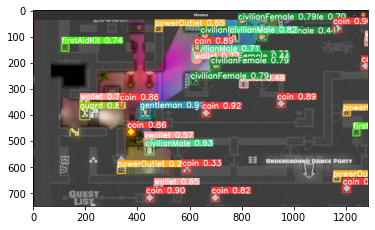

In [38]:
%matplotlib inline
plt.imshow(np.squeeze(testResults.render()))
plt.show()

In [33]:
# Loops over the individual game frames
while True:
    
    # Takes a complete screen capture of the current computer screen
    screen = pyautogui.screenshot()
    
    # Converts the outputted screen capture into a numpy array
    screenArray = np.array(screen)
    
    # Crops out the desired region of the screen capture via index slicing (Adjust as needed)
    # First value is height (By pixel = Start:Finish)
    # Second value is width
    # Third value is the Red, Green, Blue color value channels
    croppedRegion = screenArray[ :750, 2315: , : ]
    
    # Convert the color channel order
    # Open CV2 expect the color format to come is a Blue, Green, Red as opposed to the standard Red, Green, Blue
    # giving the captured image a strange tint that must be rectified, adjust the color channel order
    correctedColors = cv2.cvtColor(croppedRegion, cv2.COLOR_RGB2BGR)
    
    # Carry out object detections from the custom model
    results = model(correctedColors)
    
    # Handles the rendering of the images and videos
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    # CV2.WaitKey in order to give the in game frame a chance to reupdate
    # Gives a delay in miliseconds then checks if the 'q' letter has been hit on the keyboard
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    
    
    # Closes down the current OpenCV2 frame
    cv2.destroyAllWindows